# Evidence and Probabilities

Bayes rule is one of the most useful parts of statistics. It allows us to estimate probabilities that would otherwise be impossible.

In this worksheet we look at bayes at a basic level, then try a naive classifier.

## Bayes Rule

Following on from the previous marketing examples, consider the following situation. You have already developed a model that decides to either show and advert, or not show an advert, to a set of customers.


Your boss has come back with some results and says:

> "We're going to ask you to develop a new model, but first we need a baseline to compare against. Can you tell me what is the probability that a customer will buy our product, given that they have seen your advert?".

We notice the word "given" in the sentence and we release that we can use bayes rule:

$p(B \vert A) = \frac{p(B) \times p(A \vert B)}{p(A)} = \frac{p(B) \times p(A \vert B)}{p(B) \times p(A \vert B) + p(notB) \times p(A \vert notB)}$

Where $A$ is being shown the advert and $B$ is buy our product.

Next, she provides the following statistics from the previous experiment:

- 10 people bought product after being shown the advert. (TP)
- 1000 people were not shown the advert and didn't buy. (TN)
- 50 people were shown the advert, but didn't buy. (FP)
- And 5 people bought our product without being shown any advert. (FN)

- 10 true positives. 10 people bought product.
- 1000 true negatives. Not shown advert.
- 50 false positives. They didn't buy, but were shown the advert.
- 5 false negatives, people bought even though they weren't shown the advert.

| |p | n|
|--|--|--|
|Y|10|50|
|N|5|1000|

In [1]:
T = 1000+50+10+5
p_buy = (10+5)/T
p_ad_buy = 10/15
p_notbuy = (1000+50)/T
p_ad_notbuy = 50/1050
p_buy_ad = p_buy * p_ad_buy / (p_buy * p_ad_buy + p_notbuy * p_ad_notbuy)

print("p(buy|ad) = %0.1f%%" % (p_buy_ad*100))

p(buy|ad) = 16.7%


## Naive Bayes Classifier

Now let's try a naive bayes classifier. Once again, sklearn makes this very easy.

Tasks:

- Classify the iris dataset
- Print the confusion matrix
- Print and investigate the resulting probabilities
- Plot the ROC curves

In [2]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [3]:
gnb = GaussianNB()
mdl = gnb.fit(iris.data, iris.target) # Tut, tut. We should really be splitting the training/test set.
y_pred = mdl.predict(iris.data)
cm = metrics.confusion_matrix(iris.target, y_pred)
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [4]:
y_proba = gnb.fit(iris.data, iris.target).predict_proba(iris.data)
print("These are the misclassified instances:\n", y_proba[iris.target != y_pred])
print("They were classified as:\n", y_pred[iris.target != y_pred])
print("But should have been:\n", iris.target[iris.target != y_pred])

These are the misclassified instances:
 [[  1.52821825e-122   4.56151317e-001   5.43848683e-001]
 [  7.43572418e-129   1.54494085e-001   8.45505915e-001]
 [  2.12531216e-137   7.52691316e-002   9.24730868e-001]
 [  4.59552511e-108   9.73514345e-001   2.64856553e-002]
 [  5.69697725e-125   9.58135362e-001   4.18646381e-002]
 [  2.19798649e-130   7.12645144e-001   2.87354856e-001]]
They were classified as:
 [2 2 2 1 1 1]
But should have been:
 [1 1 1 2 2 2]


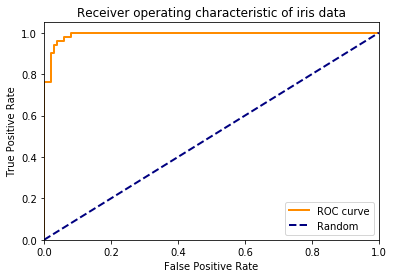

In [5]:
# Ideally, generate a curve for each target. Do it in a loop.
fpr, tpr, _ = metrics.roc_curve(iris.target, y_proba[:,1], pos_label=1)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of iris data')
plt.legend(loc="lower right")
plt.show()

## Tasks

| |actual cancer | actual no cancer |
|--|--|--|
|diagnosed cancer|8|90|
|not diagnosed cancer|2|900|

- Above is a (simulated) confusion matrix for breast cancer diagnosis.
  - What is the probability that a person has cancer given that they have a diagnosis? (Find p(cancer|diag))
  
## Bonus

- Load the digits dataset from the previous workshop, classify with a naive bayes classifier and plot the ROC curve.
- Compare that to another classifier